# Regional Profit Data Analyst and Level Of Details Calculation

## Introduction

Following the Udemy course __"Tableau 2022 Advanced: Master Tableau in Data Science"__

In this section, I will use the practice dataset of a megastore that has shop across the country in United States of America (USA).
In this dataset, there are the order information and the information of order details.
The challenge is to visualize the profit made by cities in each state, see which city provides the most profits in each state.
Through the challenge, I will note-down my knowledge and understanding of Level of Details calculation in Tableau.

In this notebook, I will do below activites:
1. Analyze and Visualize the data using Pandas and Seaborn
    1. Join two datasets
    2. Visualize the distribution of profit across the state
2. Visualize the data using Tableau
    1. Visualize data using INCLUDE
    2. Visualize the data using EXCLUDE
    3. Combine two methods in one visualize.
    
    
__Challenge: Analyze and Visualize the Regional and City profit and to analyze which cities contribute the most profit to each state__

# Analyze and Visualize the Data using Pandas and Seaborn
First of all, let's take a look at the dataset


## Importing <font color='#C70039'>Libraries</font>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import HTML, display
print("Setup Complete.")

Setup Complete.


## Importing <font color='#C70039'>Data</font>

In [2]:
file_path ="P11-MegaMerchandise.xlsx"
data = pd.read_excel(file_path, "ListOfOrders")
data.head()

Order ID Order Date     Customer Name        Country Region  \
0  BN-2013-9375572 2013-06-10     Melody Nelson  United States   West   
1  BN-2013-2545155 2013-03-13        Paige Bibi  United States   West   
2  BN-2014-1317809 2014-02-07  Annabelle Heydon  United States  South   
3  BN-2012-1349610 2012-05-31          David To  United States  South   
4  BN-2014-9861831 2014-07-30      Leroy Samson  United States   West   

         State          City  Postal Code      Segment  Ship Date  \
0      Wyoming  Rock Springs        82901    Corporate 2013-06-14   
1      Wyoming  Rock Springs        82901  Home Office 2013-03-13   
2  Mississippi    Greenville        38701  Home Office 2014-02-14   
3  Mississippi    Greenville        38701  Home Office 2012-06-02   
4   California      Calexico        92231  Home Office 2014-08-04   

      Ship Mode  
0       Economy  
1     Immediate  
2       Economy  
3  Economy Plus  
4  Economy Plus

In [40]:
#checking the number of rows and columns
rows,columns = data.shape[0],data.shape[1]

#checking the number of NaN
no_of_nan = data.isna().sum().sum()

display(HTML(f"<b style='color:#C70039'>Inference: </b><ul><li> There are {rows} rows and {columns} columns </li> <li>There are {no_of_nan} NaN values.</li></ul>"))

Using pandas to read the first sheet of the dataset, we see that with each order ID, we have information of order date, customer name, region, state, city, postal code, ship date, ship mode.

There are a lot of information that we can use to analyze.

However in this challenge, since we focus on calculating the profit percentage each city contributing to the state, we will focus more on the information of State and City.


In [31]:
data2 = pd.read_excel(file_path, "OrderBreakdown")
data2.head()

Order ID                                Product Name  Discount  \
0  AZ-2011-1029887  Novimex Color Coded Labels, 5000 Label Set       0.0   
1  AZ-2011-1029887              Deflect-O Door Stop, Erganomic       0.0   
2   AZ-2011-107716               Belkin Flash Drive, Bluetooth       0.0   
3  AZ-2011-1087704                  Tenex Stacking Tray, Black       0.0   
4  AZ-2011-1087704              Avery Binding Machine, Durable       0.0   

   Sales  Profit  Quantity         Category Sub-Category  
0     26       7         2  Office Supplies       Labels  
1     85      15         2        Furniture  Furnishings  
2    294     109         7       Technology  Accessories  
3     76      11         3        Furniture  Furnishings  
4    252      15         5  Office Supplies      Binders

In [41]:
#checking the number of rows and columns
rows,columns = data2.shape[0],data2.shape[1]

#checking the number of NaN
no_of_nan = data2.isna().sum().sum()

display(HTML(f"<b style='color:#C70039'>Inference: </b><ul><li> There are {rows} rows and {columns} columns </li> <li>There are {no_of_nan} NaN values.</li></ul>"))

## Join <font color='#C70039'>Datas</font>

In the sheet Order Breakdown, we list of each items belonging to orders.

Next we will join two table together using Inner join.
Those two datasets will be joined using Order ID.

In [6]:
joined_data = pd.merge(data,data2,on="Order ID")
joined_data.head()

Order ID Order Date     Customer Name        Country Region  \
0  BN-2013-9375572 2013-06-10     Melody Nelson  United States   West   
1  BN-2013-2545155 2013-03-13        Paige Bibi  United States   West   
2  BN-2013-2545155 2013-03-13        Paige Bibi  United States   West   
3  BN-2014-1317809 2014-02-07  Annabelle Heydon  United States  South   
4  BN-2014-1317809 2014-02-07  Annabelle Heydon  United States  South   

         State          City  Postal Code      Segment  Ship Date  Ship Mode  \
0      Wyoming  Rock Springs        82901    Corporate 2013-06-14    Economy   
1      Wyoming  Rock Springs        82901  Home Office 2013-03-13  Immediate   
2      Wyoming  Rock Springs        82901  Home Office 2013-03-13  Immediate   
3  Mississippi    Greenville        38701  Home Office 2014-02-14    Economy   
4  Mississippi    Greenville        38701  Home Office 2014-02-14    Economy   

                                    Product Name  Discount  Sales  Profit  \
0                            Hoover Stove, White       0.5   3400   -3060   
1  Office Star Executive Leather Armchair, Black       0.5   2571   -2211   
2           Ikea Floating Shelf Set, Traditional       0.5    511    -450   
3                 Sauder Classic Bookcase, Metal       0.5   2830   -1981   
4                 Fellowes File Cart, Wire Frame       0.5    205    -119   

   Quantity         Category Sub-Category  
0        12  Office Supplies   Appliances  
1        11        Furniture       Chairs  
2         6        Furniture    Bookcases  
3        13        Furniture    Bookcases  
4         3  Office Supplies      Storage

## Distribution of <font color='#C70039'>Profit</font>

In [14]:
state_data = joined_data.groupby("State").Profit.sum()

state_data.head()

State
Alabama        1287
Arizona         685
Arkansas       3244
California    29715
Colorado       4674
Name: Profit, dtype: int64

/Users/vuhuonglinh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'Arkansas'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Colorado'),
  Text(5, 0, 'Connecticut'),
  Text(6, 0, 'Delaware'),
  Text(7, 0, 'District of Columbia'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Idaho'),
  Text(11, 0, 'Illinois'),
  Text(12, 0, 'Indiana'),
  Text(13, 0, 'Iowa'),
  Text(14, 0, 'Kansas'),
  Text(15, 0, 'Kentucky'),
  Text(16, 0, 'Louisiana'),
  Text(17, 0, 'Maine'),
  Text(18, 0, 'Maryland'),
  Text(19, 0, 'Massachusetts'),
  Text(20, 0, 'Michigan'),
  Text(21, 0, 'Minnesota'),
  Text(22, 0, 'Mississippi'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Montana'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Nevada'),
  Text(27, 0, 'New Hampshire'),
  Text(28, 0, 'New J

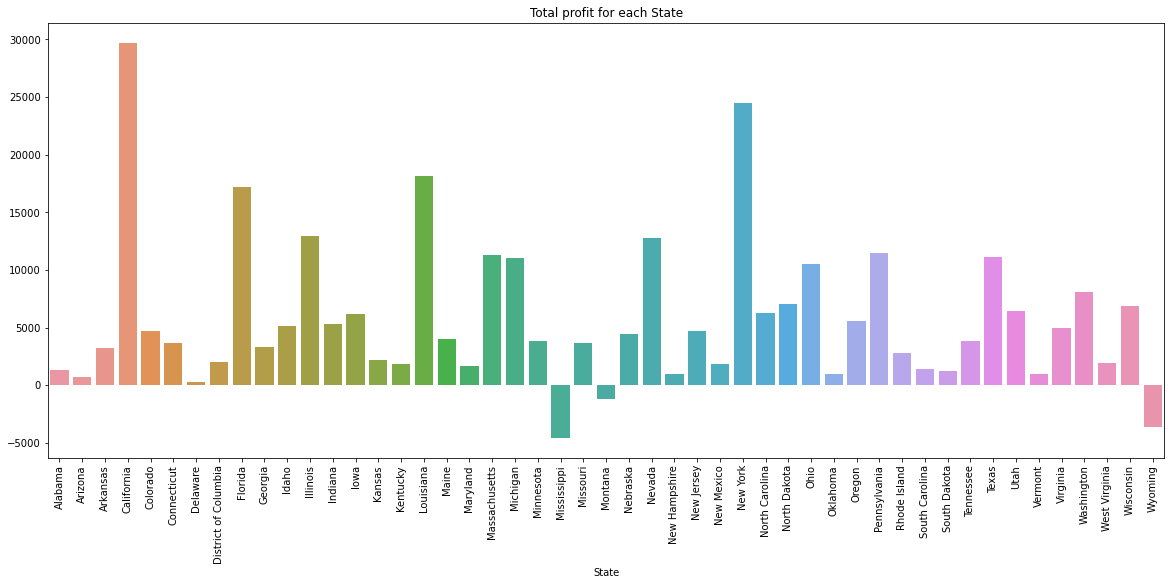

In [19]:
plt.figure(figsize=(20,8))
plt.title("Total profit for each State")

sns.barplot(state_data.index,state_data.values)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Profit', ylabel='Count'>

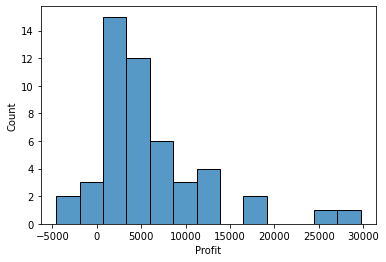

In [44]:
#Histogram
sns.histplot(state_data)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

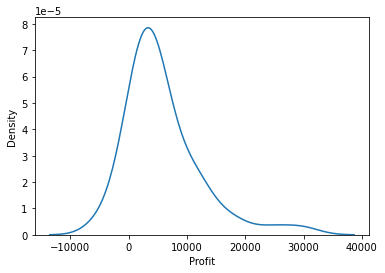

In [45]:
#KDE Plot
sns.kdeplot(state_data)

In [46]:
display(HTML(f"<b style='color:#C70039'>Inference: </b><ul><li> Most of the states bring back less than average number of profit. </li> </ul>"))

### Calculate the sum profit of each city within a state

In [25]:
joined_data.groupby(["State","City"]).Profit.agg([sum])

sum
State     City              
Alabama   Auburn        1236
          Birmingham      17
          Decatur        246
          Enterprise     241
          Hoover         -99
...                      ...
Wisconsin Wauwatosa      430
          West Allis     342
          West Bend      731
Wyoming   Cheyenne      1947
          Rock Springs -5602

[924 rows x 1 columns]

## Visualize Data with Tableau

<div class="alert alert-block alert-info">
<b>Tip:</b> In Tableau, granularity and aggregation work opposite of each other.
Level of Granularity is the level of detail of the data.
When you bring dimensions and measure to the view, the measures are aggregated by whatever dimensions are on the view. <b>As you remove and add more dimension, you are decreasing and increasing the granularity. The more dimension/ details on the view, the more granular it is</b>.
</div>

### Level of Calculation with INCLUDE

Include LOD is used when you want to calculate a measure at a lower level of detail compared to the viz's level of detail.

In this challenge, we want to visualize the average profit of state level instead of the city level. 
Therefore we visualize the state in the map and calculate the information of profit using the data at the city level.
That's when we bring in the INCLUDE LOD.

In this formula, we include the City level in our calculation

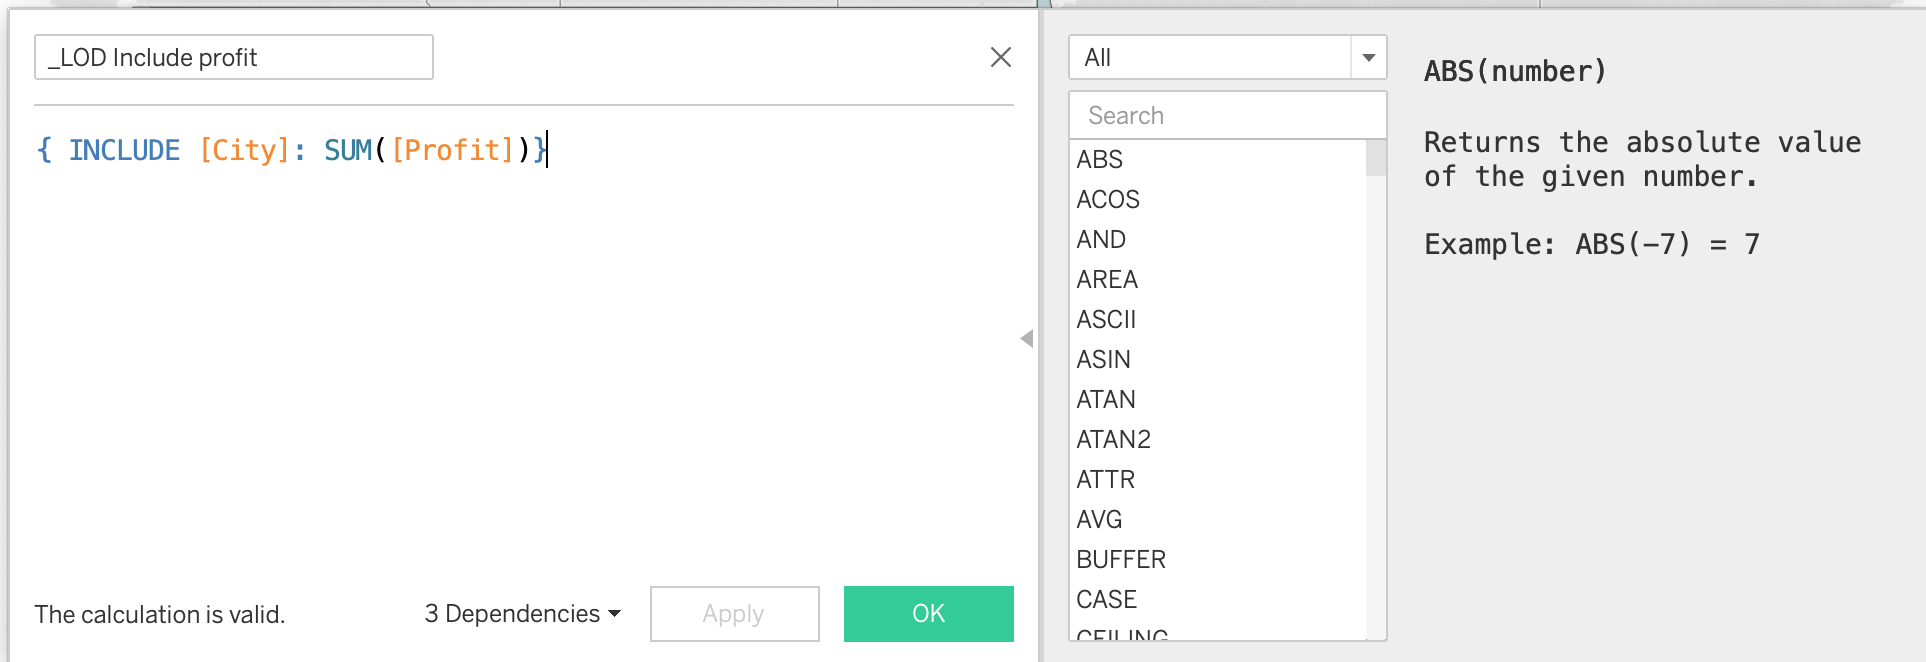

We change the measure from SUM to AVG to calculate the average profit.

And we have a viz as below:

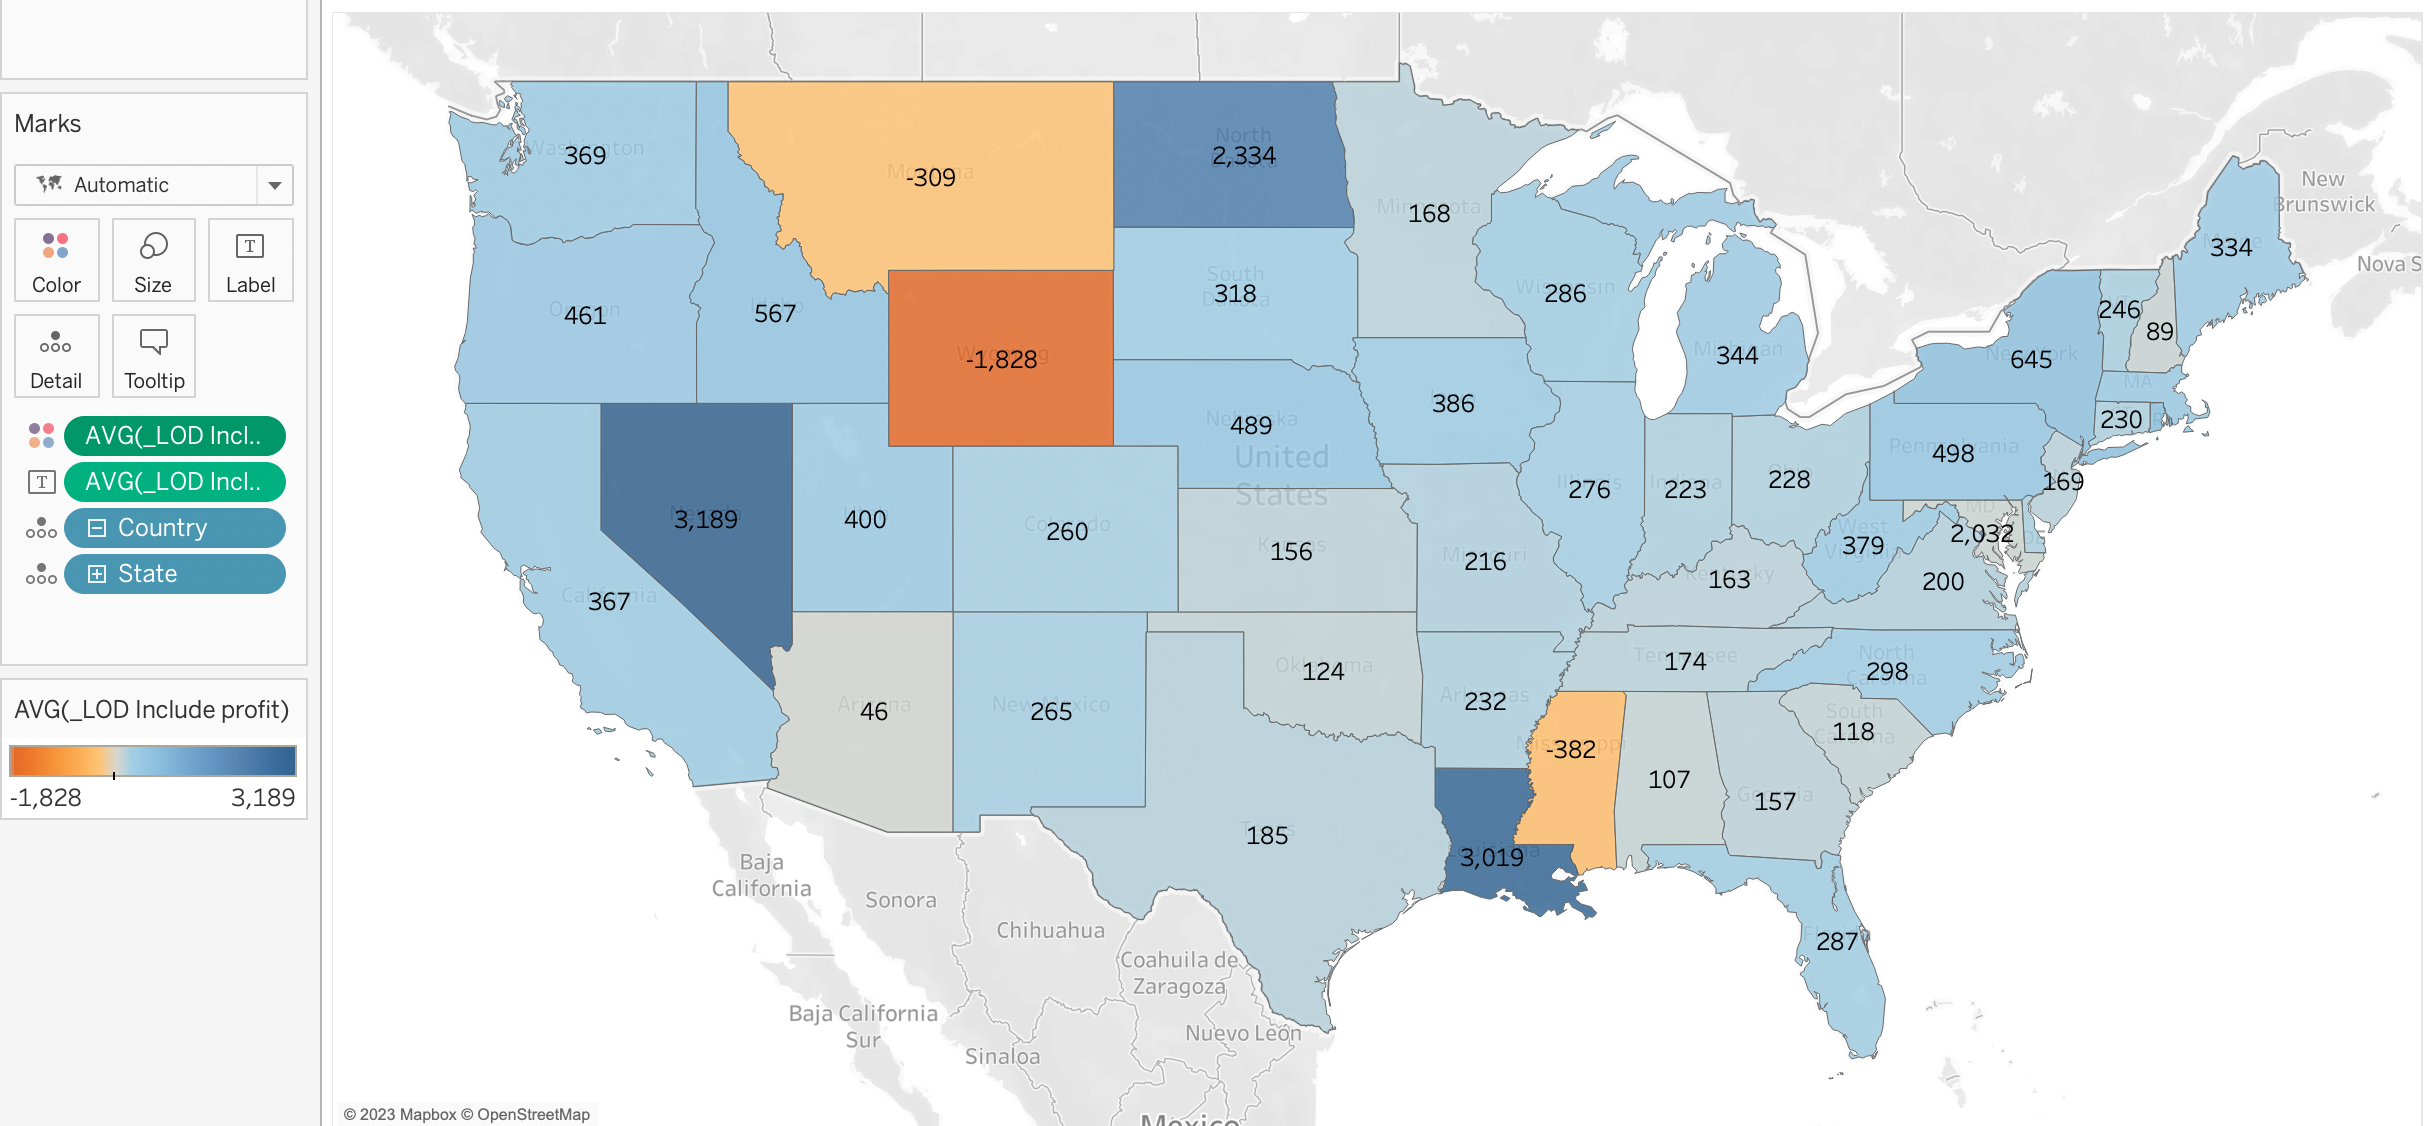

### Level of Calculation with Exclude

Exclude calculates the measure at a higher level of detail than what is currently on the view.

In the next analyse, we have to calculate the sum profit of each city/ sum profit of the state.

To calculate profit at state level, we use this formula

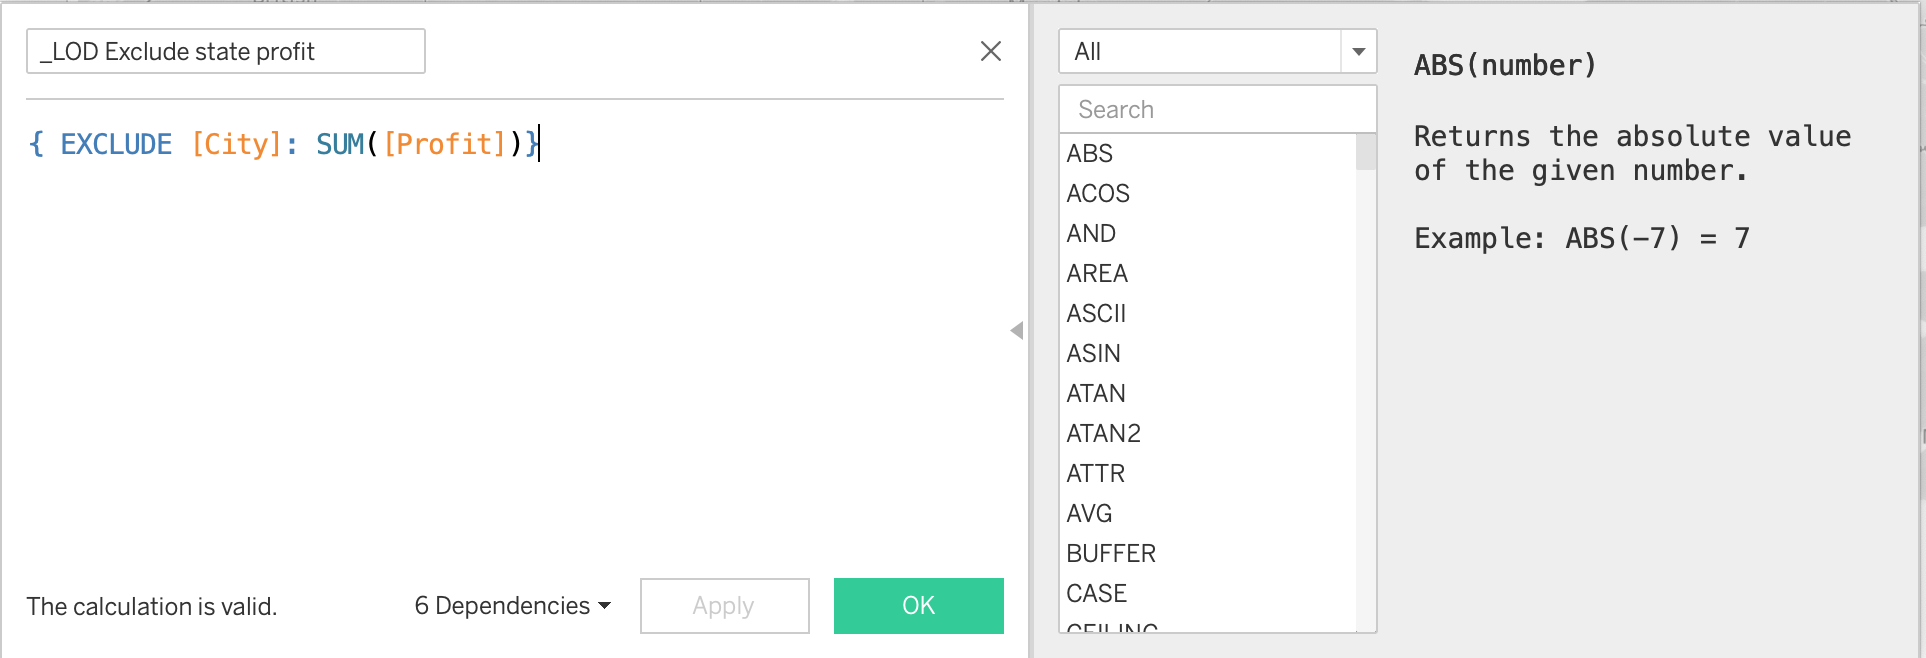

When we drag this measure into the viz, we see that the viz has returned the number of profit of the state.

To calculate the proportion of the profit of each city per state, we use the calculate: [SUM([Profit]])/ATTR([_LOD Exclude state profit]])*SIGN(ATTR([_L...]
- SUM([Profit]) : total profit of a city
- ATTR([_LOD Exclude state profit]]: return the state profit 
- SIGN (ATTR([_LOD Exclude state profit]]) : if the state profit is negative, it will return the negative number. This is to present negative number as it is.

When representing the profit loss as the circle on the viz, there is an issue that negative number will be represented by a small circle which will not gather attention of reader to this negative point. Thus we use ABS function to always take the positive number and therefore the circle representing the even negative number will not be dwarfted by other circles.

> [ABS(SUM([Profit]])/ATTR([_LOD Exclude state profit]]))]

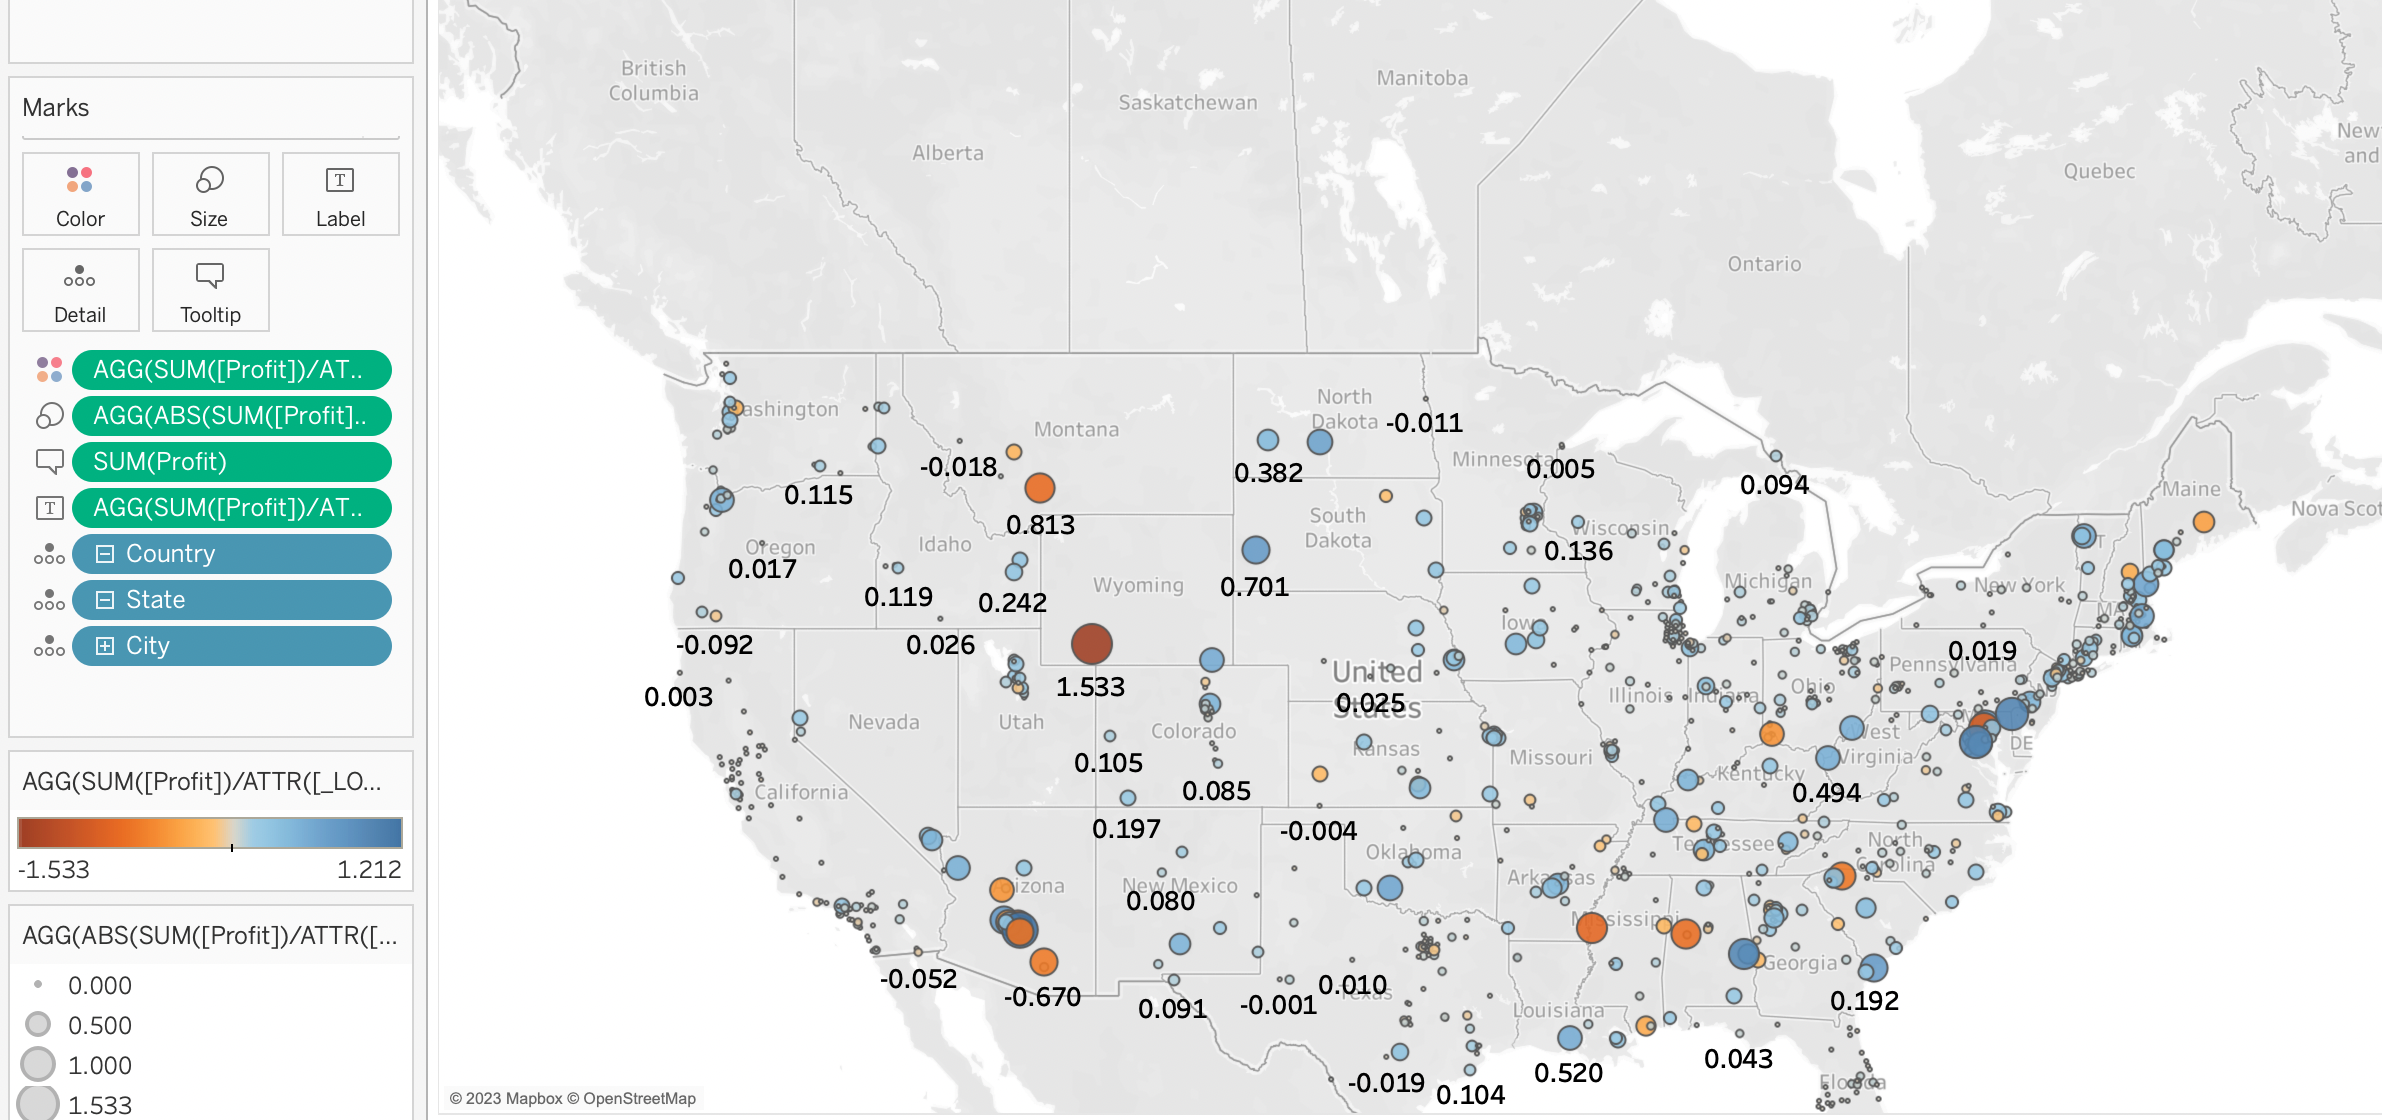

When we combine two vizes, we have the visualization as follow

Looking at this map, we can see how well each state is doing in term of profit.
And which city contributed the most to the profit of each state.


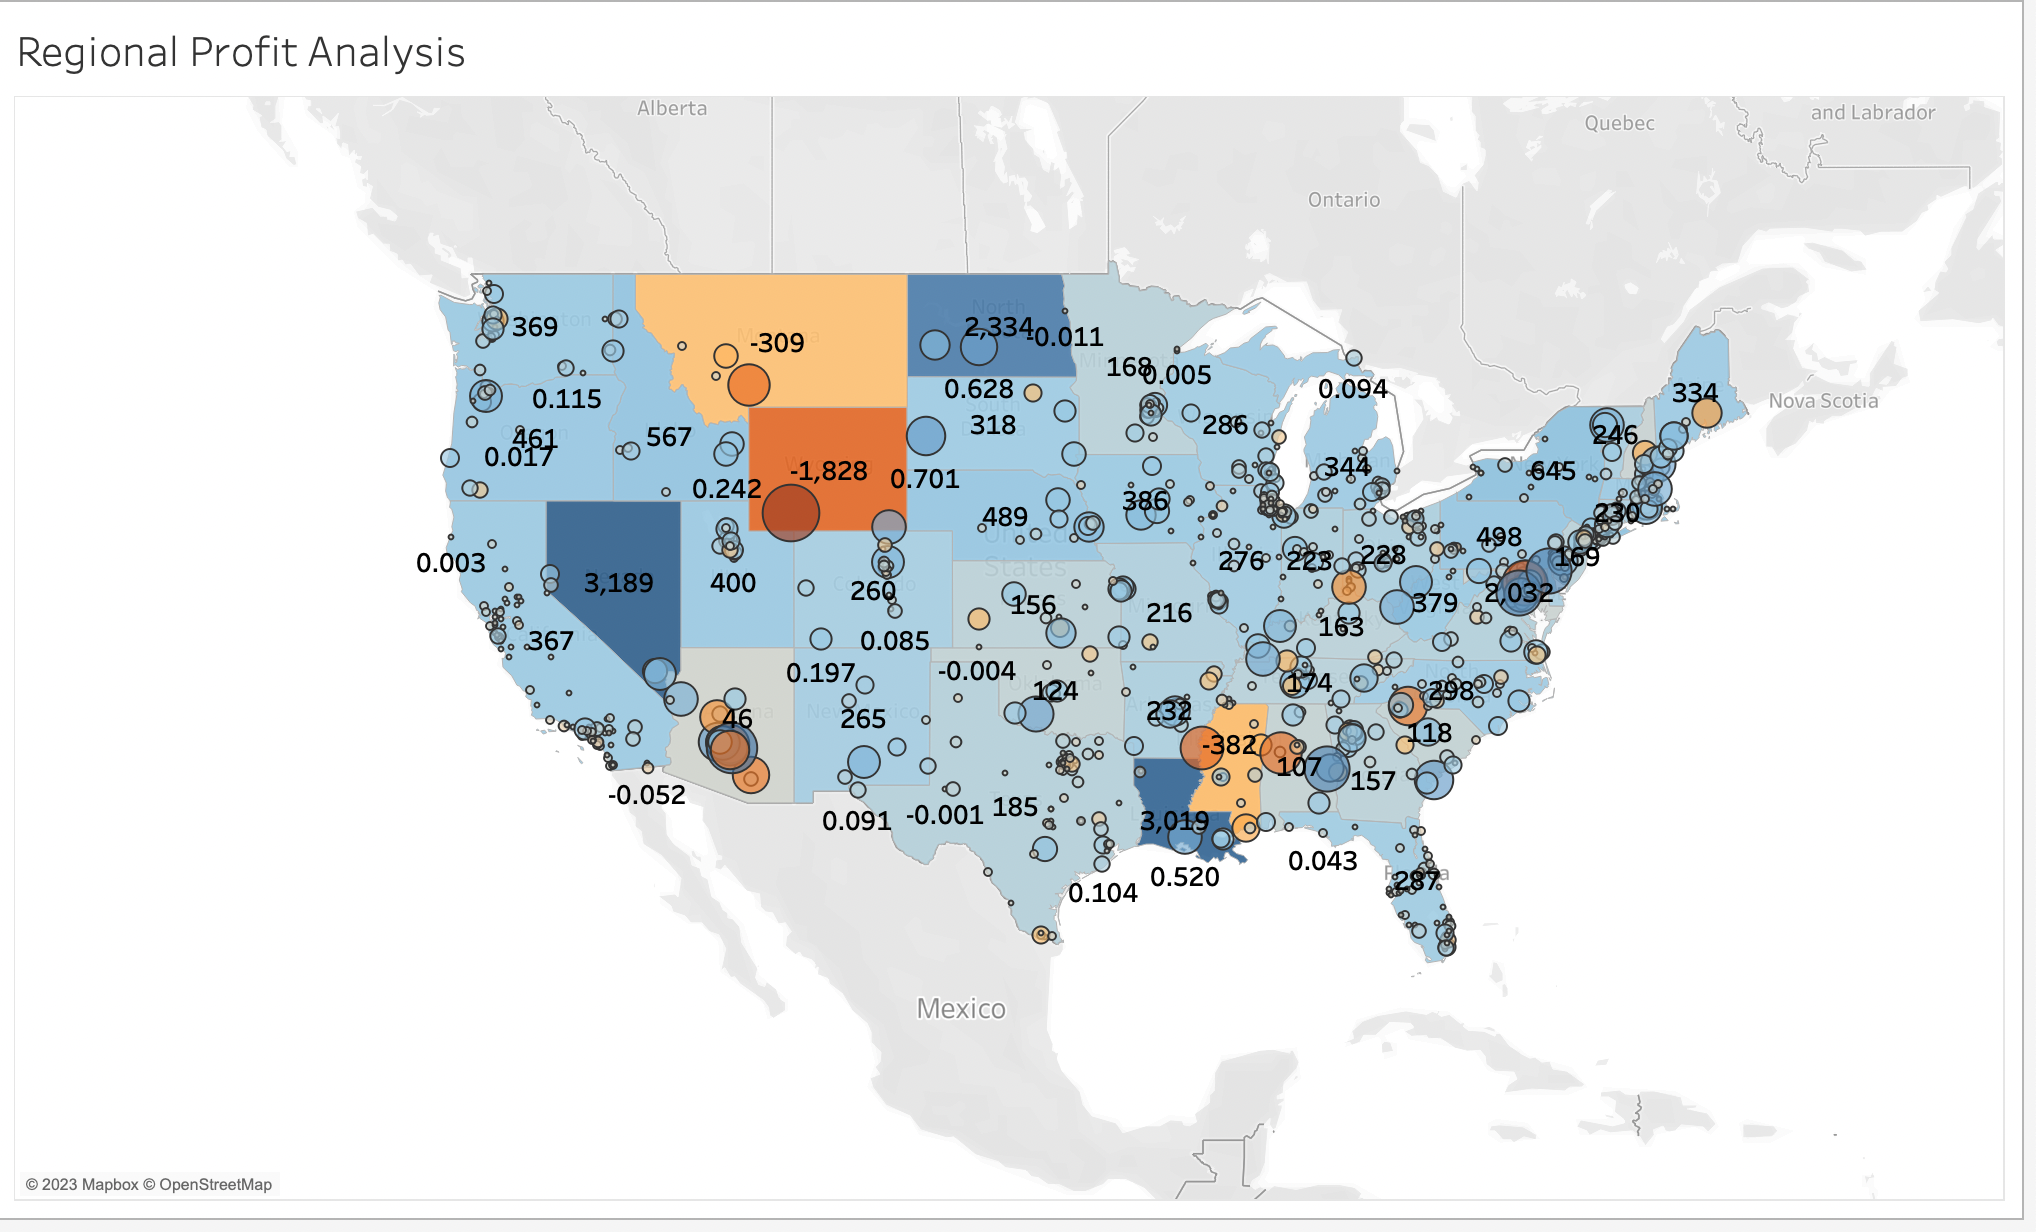

Visit Tableau Public for interactive viz: https://public.tableau.com/app/profile/vu.huong.linh/viz/RegionalSalesProfitAnalysis/Dashboard1

### That's the end.